Import libraries 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [3]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [4]:
#import DF

df_list = pd.read_csv(r"C:\Users\18179\Documents\CareerFoundry\Independent Project\02 Data\Raw Data\Listings.csv\Listings.csv", index_col = False)

C:\Users\18179\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (5,13) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Clean Data

In [5]:
#Clean extreme values

df_list = df_list[df_list['price'] < 1000]

In [6]:
#create country column

df_list.loc[df_list['city'] == 'Paris', 'country'] = 'France'
df_list.loc[df_list['city'] == 'New York', 'country'] = 'United States of America'
df_list.loc[df_list['city'] == 'Sydney', 'country'] = 'Australia'
df_list.loc[df_list['city'] == 'Rome', 'country'] = 'Italy'
df_list.loc[df_list['city'] == 'Rio de Janeiro', 'country'] = 'Brazil'
df_list.loc[df_list['city'] == 'Istanbul', 'country'] = 'Turkey'
df_list.loc[df_list['city'] == 'Mexico City', 'country'] = 'Mexico'
df_list.loc[df_list['city'] == 'Bangkok', 'country'] = 'Thailand'
df_list.loc[df_list['city'] == 'Cape Town', 'country'] = 'South Africa'
df_list.loc[df_list['city'] == 'Hong Kong', 'country'] = 'China'

In [12]:
#Select necessary columns, can't use strings.

columns = ['price',
           'host_total_listings_count',
           'review_scores_rating',
           'review_scores_accuracy',
           'review_scores_cleanliness',
           'review_scores_checkin',
           'review_scores_location',
           'review_scores_value',
           
          ]

In [13]:
#create subset

City_rev = df_list[columns]

In [14]:
#impute missing values

City_rev['host_total_listings_count'].fillna(City_rev['host_total_listings_count'].median(), inplace = True)
City_rev['review_scores_rating'].fillna(City_rev['review_scores_rating'].median(), inplace = True)
City_rev['review_scores_accuracy'].fillna(City_rev['review_scores_accuracy'].median(), inplace = True)
City_rev['review_scores_cleanliness'].fillna(City_rev['review_scores_cleanliness'].median(), inplace = True)
City_rev['review_scores_checkin'].fillna(City_rev['review_scores_checkin'].median(), inplace = True)
City_rev['review_scores_location'].fillna(City_rev['review_scores_location'].median(), inplace = True)
City_rev['review_scores_value'].fillna(City_rev['review_scores_value'].median(), inplace = True)

C:\Users\18179\anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [ ]:
Elbow Technique

In [10]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [15]:
#create score that represents a rate of variation for cluster operation
score = [kmeans[i].fit(City_rev).score(City_rev) for i in range(len(kmeans))] 

score

[-29556466798.19833,
 -14037507070.060074,
 -4666558362.057922,
 -3058372232.7172976,
 -1794067241.103903,
 -1232699379.6846554,
 -985316997.9189562,
 -770260577.9066519,
 -618874154.8944355]

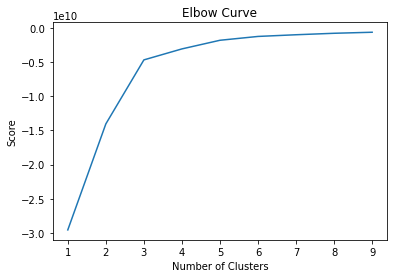

In [16]:
#plot elbow curve using pylab

pl.plot(num_cl, score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

K means Clustering

In [27]:
#create k-means object
kmeans = KMeans(n_clusters = 4, n_jobs = -1)

4a. 
I chose four clusters because the graph still has some slope from 3 to 4. Also, the value counts function showed that when 
3 clusters are chosen there is still the outlier group of 300 units, while making 2 large data groups. Choosing 4 clusters
allows for the 3 seperate groups. 

In [28]:
#Fit kmeans to df
kmeans.fit(City_rev)

C:\Users\18179\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=4, n_jobs=-1)

In [29]:
City_rev['clusters'] = kmeans.fit_predict(City_rev)

C:\Users\18179\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
<ipython-input-29-fc61e1739cee>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  City_rev['clusters'] = kmeans.fit_predict(City_rev)


In [30]:
City_rev.head()

,price,host_total_listings_count,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_location,review_scores_value,clusters
0,53,1.0,100.0,10.0,10.0,10.0,10.0,10.0,0
1,120,1.0,100.0,10.0,10.0,10.0,10.0,10.0,0
2,89,1.0,100.0,10.0,10.0,10.0,10.0,10.0,0
3,58,1.0,100.0,10.0,10.0,10.0,10.0,10.0,0
4,60,1.0,100.0,10.0,10.0,10.0,10.0,10.0,0


In [31]:
City_rev['clusters'].value_counts()

0    169585
3     49170
1     25713
2       298
Name: clusters, dtype: int64

There are three times more items in the tan cluster than the dark purple cluster, which has twice as many units than the 
purple cluster. 

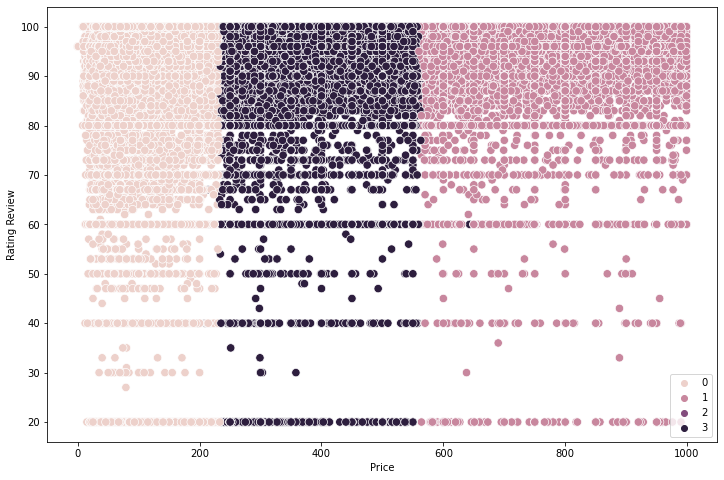

In [53]:
#Plot price vs total review score

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=City_rev['price'], y=City_rev['review_scores_rating'], hue=kmeans.labels_, s=70) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Price') # Label x-axis.
plt.ylabel('Rating Review') # Label y-axis.
plt.show()

Viewing the chart with price on the x-axis shows how the clusters are formed mainly around price. Even though the tan 
cluster range is smaller, it has the most readings. 

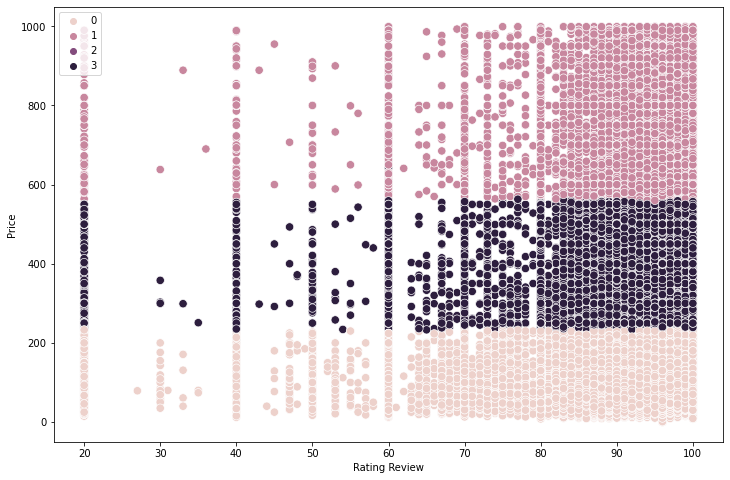

In [36]:
#Plot total review score vs price

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=City_rev['review_scores_rating'], y=City_rev['price'], hue=kmeans.labels_, s=70) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Rating Review') # Label x-axis.
plt.ylabel('Price') # Label y-axis.
plt.show()

This chart shows the clusters based on price, but makes it easier to see the ratings. The less expensive rentals have more frequent low ratings. 20, 40, 60 are the most common low rating that span the whole price range. This might show how some rentals are missing the mark entirely on some variables. One would think that expensive Airbnb's would not have any low scores, but it follows the same pattern as lower priced rentals. 


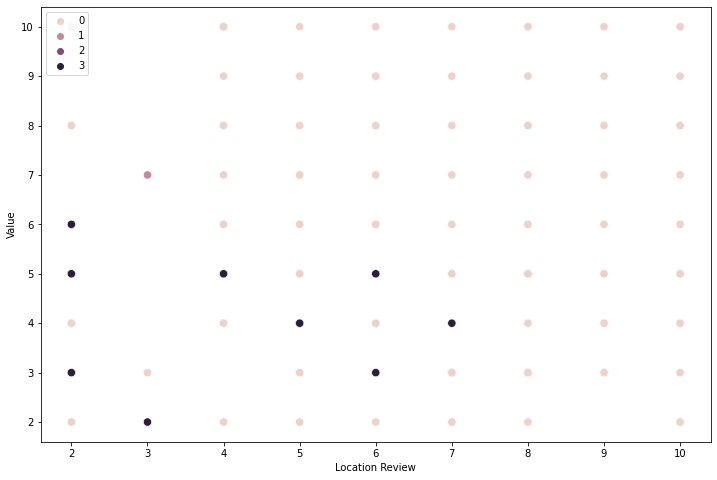

In [37]:
#Plot  Review location vs value

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=City_rev['review_scores_location'], y=City_rev['review_scores_value'], hue=kmeans.labels_, s=70) 

ax.grid(False) .
plt.xlabel('Location Review') 
plt.ylabel('Value') 
plt.show()

This chart is an attempt at comparing score variables. There is no clustering pattern and does not provide insight.

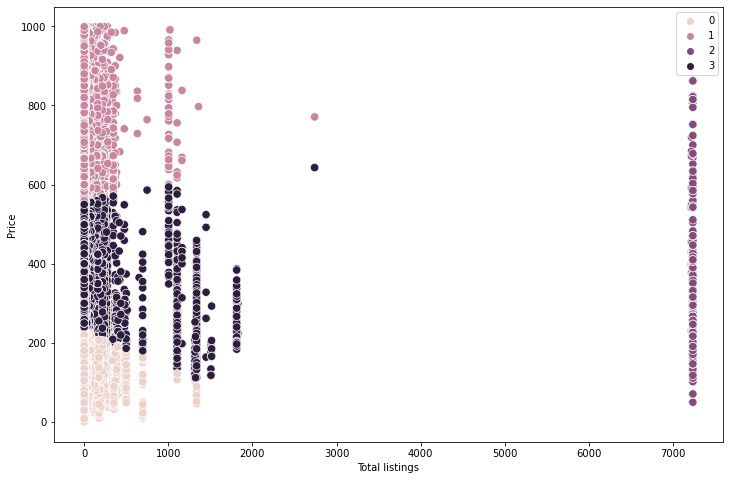

In [39]:
#Plot Price vs host listings

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=City_rev['host_total_listings_count'], y=City_rev['price'], hue=kmeans.labels_, s=70) 

ax.grid(False)
plt.xlabel('Total listings') 
plt.ylabel('Price') 
plt.show()

Using the host_total_listings variable reveals the fourth cluster. This purple cluster was made because it is an anomaly
with the amount listings these hosts have. These are likely commercial hotel chains that are trying to take advantage of Airbnbs reach into the market. 

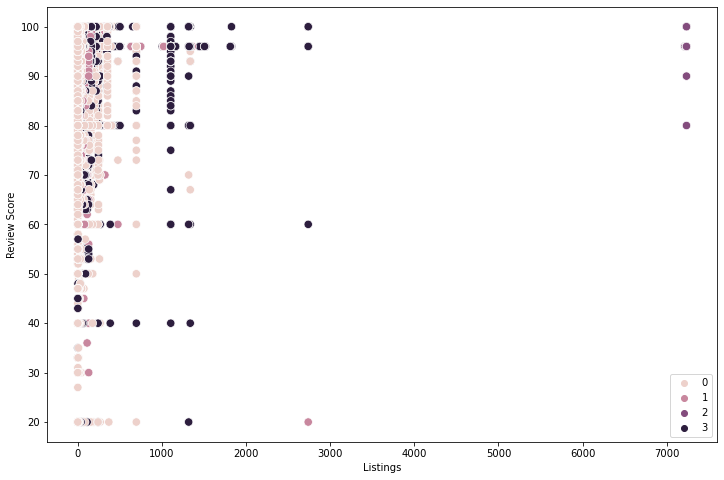

In [57]:
#Plot review scores vs host listings

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=City_rev['host_total_listings_count'], y=City_rev['review_scores_rating'], hue=kmeans.labels_, s=70) 

ax.grid(False)
plt.xlabel('Listings') 
plt.ylabel('Review Score') 
plt.show()

Using the listings category singles out certain review scores. This can be used to look further into those rentals.

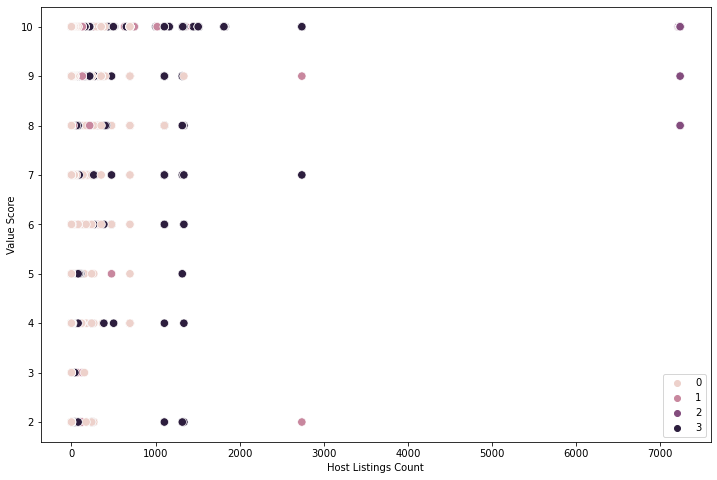

In [58]:
#Plot value scores vs host listings

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=City_rev['host_total_listings_count'], y=City_rev['review_scores_value'], hue=kmeans.labels_, s=70) 

ax.grid(False)
plt.xlabel('Host Listings Count') 
plt.ylabel('Value Score') 
plt.show()

Is there a threshold amount of listings that give guests a better perceived value?

In [ ]:
Is there a threshold amount of listings that give guests a better perceived value

In [51]:
#Descriptive Statistics 

City_rev.loc[City_rev['clusters'] == 2, 'cluster'] = 'purple'
City_rev.loc[City_rev['clusters'] == 1, 'cluster'] = 'pink'
City_rev.loc[City_rev['clusters'] == 0, 'cluster'] = 'tan'
City_rev.loc[City_rev['clusters'] == 3, 'cluster'] = 'dark purple'

C:\Users\18179\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\18179\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\18179\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

In [52]:
City_rev.groupby('cluster').agg({'host_total_listings_count':['mean', 'median'], 
                         'price':['mean', 'median'], 
                         'review_scores_rating':['mean', 'median'],
                          'review_scores_accuracy':['mean', 'median'],
                        'review_scores_cleanliness' : ['mean', 'median'],
                        'review_scores_checkin' : ['mean', 'median'],
                        'review_scores_location' : ['mean', 'median'],
                        'review_scores_value' : ['mean', 'median']})


host_total_listings_count               price         \
                                 mean  median        mean median   
cluster                                                            
dark purple                 33.373337     2.0  363.466341    350   
pink                        18.088554     2.0  757.578190    750   
purple                    7234.120805  7235.0  324.677852    268   
tan                          7.800242     1.0   98.315034     85   

            review_scores_rating        review_scores_accuracy         \
                            mean median                   mean median   
cluster                                                                 
dark purple            94.456986   96.0               9.713830   10.0   
pink                   94.635787   96.0               9.728192   10.0   
purple                 95.979866   96.0               9.956376   10.0   
tan                    93.947324   96.0               9.688428   10.0   

            review_scores_cleanliness        review_scores_checkin         \
                                 mean median                  mean median   
cluster                                                                     
dark purple                  9.596197   10.0              9.809762   10.0   
pink                         9.654183   10.0              9.809824   10.0   
purple                      10.000000   10.0              9.993289   10.0   
tan                          9.464015   10.0              9.786432   10.0   

            review_scores_location        review_scores_value         
                              mean median                mean median  
cluster                                                               
dark purple               9.793045   10.0            9.567846   10.0  
pink                      9.750749   10.0            9.607358   10.0  
purple                    9.993289   10.0            9.983221   10.0  
tan                       9.732270   10.0            9.517115   10.0

10a.
The descriptive statistics can be used to categorize properties and dive deeper into those categories further down the analytics pipeline. They show how the clusters were formed based on price and host listings. The variance within the clusters tells of their density. It also shows how there is likely just two seperate hosts that are in the purple cluster. 

In [56]:
City_rev['clusters'].value_counts()

0    169585
3     49170
1     25713
2       298
Name: clusters, dtype: int64